In [1]:
from model import UNet
import config
import numpy as np
import imageio.v2 as imageio
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt

img_dir = '/home/reginaldo/Documents/ime/pfc/output_cbers4a_image_patch8-5.tif'
img_io = imageio.imread(img_dir)
maximo = np.max(img_io)
img = np.float32(img_io) / maximo

image = (((img_io / maximo)) * 255.)[:, :, :3]

copy = img.copy()
copy = copy.transpose((2, 0, 1))
copy = torch.from_numpy(copy).float()
copy = nn.functional.normalize(copy)
input_tensor = copy.unsqueeze(0)

model = UNet.load_from_checkpoint("/media/reginaldo/pfc-dados/dataset-piloto/testes/treino1/epoch=25-step=1846.ckpt")
model = model.float()
model.eval()
if torch.cuda.is_available():
    model = model.cuda()
    input_tensor = input_tensor.cuda()

output = model(input_tensor)

normalized_masks = torch.nn.functional.softmax(output, dim=1).cpu()
sem_classes = [
    'fundo', 'nuvem-densa', 'nuvem-fina', 'sombra'
]
sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(sem_classes)}

nuvem_densa_category = sem_class_to_idx["nuvem-fina"]
mask = normalized_masks[0, :, :, :].argmax(axis=0).detach().cpu().numpy()
max_pixel = np.max(np.unique(np.uint8(mask == nuvem_densa_category)))

mask_uint8 = (255 * np.uint8(mask == nuvem_densa_category)) / max_pixel
mask_float = np.float32(mask == nuvem_densa_category)
both_images = np.hstack((image, np.repeat(mask_uint8[:, :, None], 3, axis=-1)))

Image.fromarray(both_images.astype('uint8'))

FileNotFoundError: [Errno 2] No such file or directory: '/media/reginaldo/pfc-dados/dataset-piloto/testes/treino1/epoch=25-step=1846.ckpt'

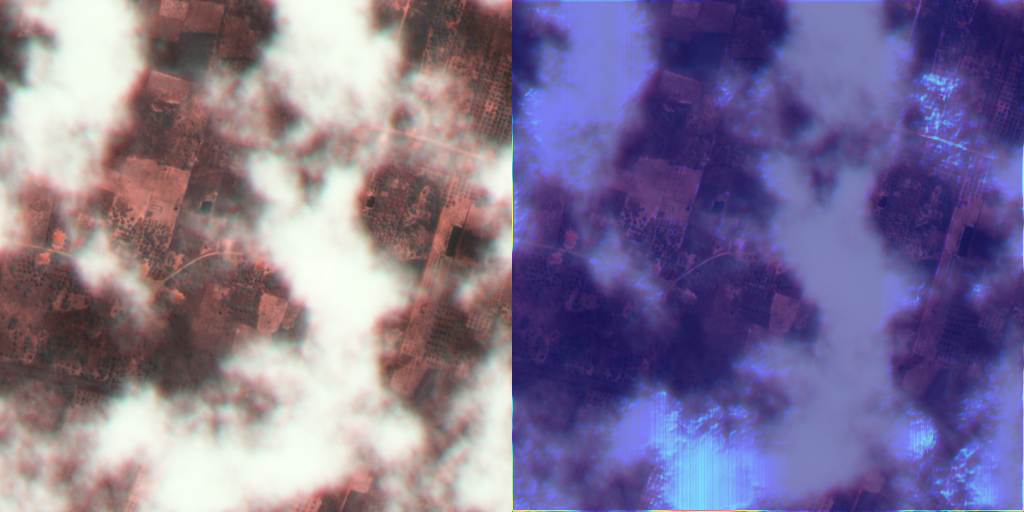

In [3]:
from pytorch_grad_cam import GradCAM

layers = ['down1', 'down2', 'down3', 'down4', 'up1', 'up2', 'up3', 'up4', 'outc']

class SemanticSegmentationTarget:
    def __init__(self, category, mask):
        self.category = category
        self.mask = torch.from_numpy(mask)
        if torch.cuda.is_available():
            self.mask = self.mask.cuda()
        
    def __call__(self, model_output):
        return (model_output[self.category, :, : ] * self.mask).sum()

target_layers = [model.inc]
targets = [SemanticSegmentationTarget(nuvem_densa_category, mask_float)]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((image, cam_image))

Image.fromarray(final_image.astype('uint8'))

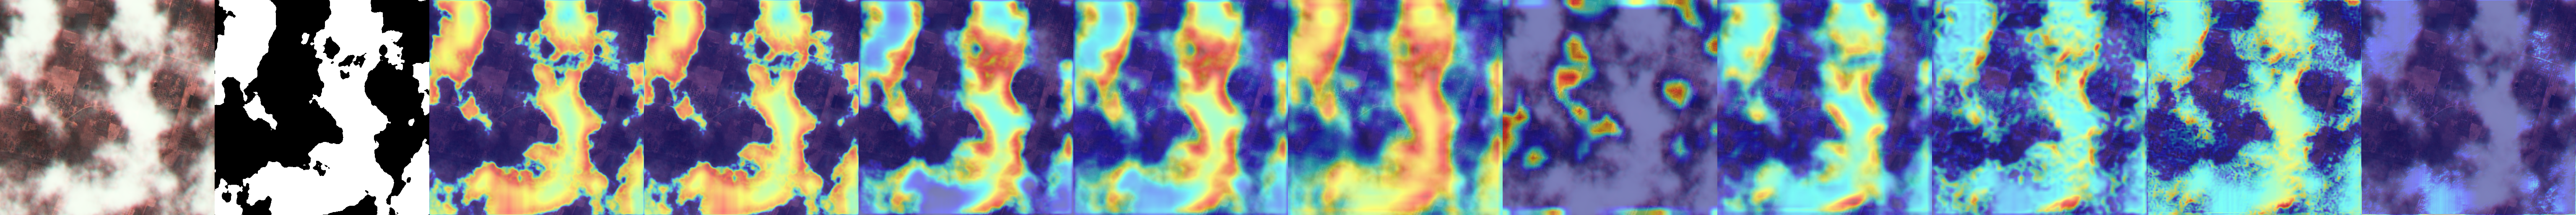

In [4]:
from pytorch_grad_cam import GradCAM

layers = ['down1', 'down2', 'down3', 'down4', 'up1', 'up2', 'up3', 'up4', 'outc']

class SemanticSegmentationTarget:
    def __init__(self, category, mask):
        self.category = category
        self.mask = torch.from_numpy(mask)
        if torch.cuda.is_available():
            self.mask = self.mask.cuda()
        
    def __call__(self, model_output):
        return (model_output[self.category, :, : ] * self.mask).sum()

target_layers = [model.outc]
targets = [SemanticSegmentationTarget(nuvem_densa_category, mask_float)]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((both_images, cam_image))

target_layers = [model.up4]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.up3]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.up2]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.up1]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.down4]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.down3]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.down2]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.down1]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

target_layers = [model.inc]

with GradCAM(model=model,
            target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(img[:, :, :3], grayscale_cam, use_rgb=True)
    final_image = np.hstack((final_image, cam_image))

Image.fromarray(final_image.astype('uint8'))